# Data Exploration

In [2]:
import sys
import os
from dotenv import load_dotenv

# load environment variables
load_dotenv()

#add working directory to sys path to execute utils/dataset.py
working_dir = os.environ.get("WORKING_DIRECTORY")
sys.path.insert(0, working_dir)

In [3]:
from utils.dataset import get_data 

df = get_data()
df.head()

Loading data from wines: 8000it [00:00, 30680.50it/s]


,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Pinot noir,5.8,0.15,0.49,1.1,76.729301,894.94,186.639301,109.91,0.048,21.0,98.0,0.99290,3.19,0.48,9.2,5
1,Merlot,6.6,0.25,0.32,5.6,4.795712,1160.95,251.875712,247.08,0.039,15.0,68.0,0.99163,2.96,0.52,11.1,6
2,Chardonnay,6.7,0.21,0.34,1.5,85.193710,789.82,304.703710,219.51,0.035,45.0,123.0,0.98949,3.24,0.36,12.6,7
3,Merlot,8.3,0.28,0.27,17.5,11.976525,777.86,237.586525,225.61,0.045,48.0,253.0,1.00014,3.02,0.56,9.1,6
4,Merlot,7.5,0.42,0.19,6.9,5.599673,785.72,95.399673,89.80,0.041,62.0,150.0,0.99508,3.23,0.37,10.0,6


In [4]:
#make a data exploration
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,8000.000000,8000.000000,7994.000000,7992.000000,7992.000000,7992.000000,7992.000000,7992.000000,7992.000000,7992.000000,7992.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6.856625,0.278486,0.334929,6.406219,49.324446,934.437470,285.652011,236.327565,0.045875,35.191567,138.605856,0.994046,3.187270,0.490520,10.507502,6.561750
std,0.841727,0.100296,0.120249,5.104317,29.086962,270.488368,76.881459,71.298176,0.022340,17.079654,42.704772,0.003024,0.150369,0.114318,1.227373,8.757213
min,3.800000,0.080000,0.000000,0.600000,0.035118,93.000000,16.045445,3.000000,0.009000,2.000000,9.000000,0.987130,2.720000,0.220000,8.000000,1.000000
25%,6.300000,0.210000,0.270000,1.700000,24.208416,747.295000,233.481329,187.495000,0.036000,23.000000,108.000000,0.991727,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,49.078666,931.025000,284.649716,235.215000,0.043000,34.000000,135.000000,0.993730,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,74.582793,1118.372500,337.955361,284.542500,0.050000,46.000000,168.000000,0.996128,3.280000,0.550000,11.400000,6.000000
max,11.800000,1.100000,1.230000,65.800000,99.998181,1974.850000,576.761262,514.520000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,99.000000


## Missing Values

In [5]:
#create a dataframe containing only missing values from df

df_missing = df[df.isnull().any(axis=1)]
df_missing.head()


,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1334,Chardonnay,6.4,0.13,NaN,1.6,96.924983,647.75,303.424983,206.50,0.092,40.0,158.0,0.99280,3.21,0.36,9.8,6
1715,Chardonnay,7.2,0.35,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99334,2.93,0.66,10.3,7
1777,Pinot noir,6.4,0.32,NaN,10.7,47.973891,725.24,286.333891,238.36,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,5
2024,Chardonnay,6.5,0.23,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99828,3.15,0.42,9.2,6
2157,Pinot noir,6.7,0.24,NaN,8.7,46.794182,694.52,249.224182,202.43,0.036,29.0,148.0,0.99520,3.22,0.62,9.9,6


## Outliers

In [10]:
#create a function which takes 2 parameters: column and dataframe
#the function should calculate the 3rd standard deviation of the column 
#and return the rows which are above and below this value and return the percentage of this values regarding the whole dataframe

def get_outliers(column, dataframe):
    mean = dataframe[column].mean()
    std = dataframe[column].std()
    upper_limit = mean + 3 * std
    lower_limit = mean - 3 * std
    outliers = dataframe[(dataframe[column] > upper_limit) | (dataframe[column] < lower_limit)]
    percentage = len(outliers) / len(dataframe) * 100
    return outliers, percentage

#run function on each column in dataframe which is not categorical
for column in df.columns:
    if df[column].dtype != "object":
        outliers, percentage = get_outliers(column, df)
        print(f"Number of potential outliers for '{column}': {len(outliers)} ({percentage:.2f}%)")
        #print(outliers.head())

Number of potential outliers for 'fixed acidity': 74 (0.92%)
Number of potential outliers for 'volatile acidity': 138 (1.73%)
Number of potential outliers for 'citric acid': 146 (1.82%)
Number of potential outliers for 'residual sugar': 16 (0.20%)
Number of potential outliers for 'magnesium': 0 (0.00%)
Number of potential outliers for 'flavanoids': 20 (0.25%)
Number of potential outliers for 'minerals': 24 (0.30%)
Number of potential outliers for 'calcium': 24 (0.30%)
Number of potential outliers for 'chlorides': 166 (2.08%)
Number of potential outliers for 'free sulfur dioxide': 50 (0.62%)
Number of potential outliers for 'total sulfur dioxide': 22 (0.27%)
Number of potential outliers for 'density': 6 (0.07%)
Number of potential outliers for 'pH': 60 (0.75%)
Number of potential outliers for 'sulphates': 80 (1.00%)
Number of potential outliers for 'alcohol': 2 (0.03%)
Number of potential outliers for 'quality': 70 (0.88%)


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'magnesium'}>,
        <Axes: title={'center': 'flavanoids'}>,
        <Axes: title={'center': 'minerals'}>,
        <Axes: title={'center': 'calcium'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

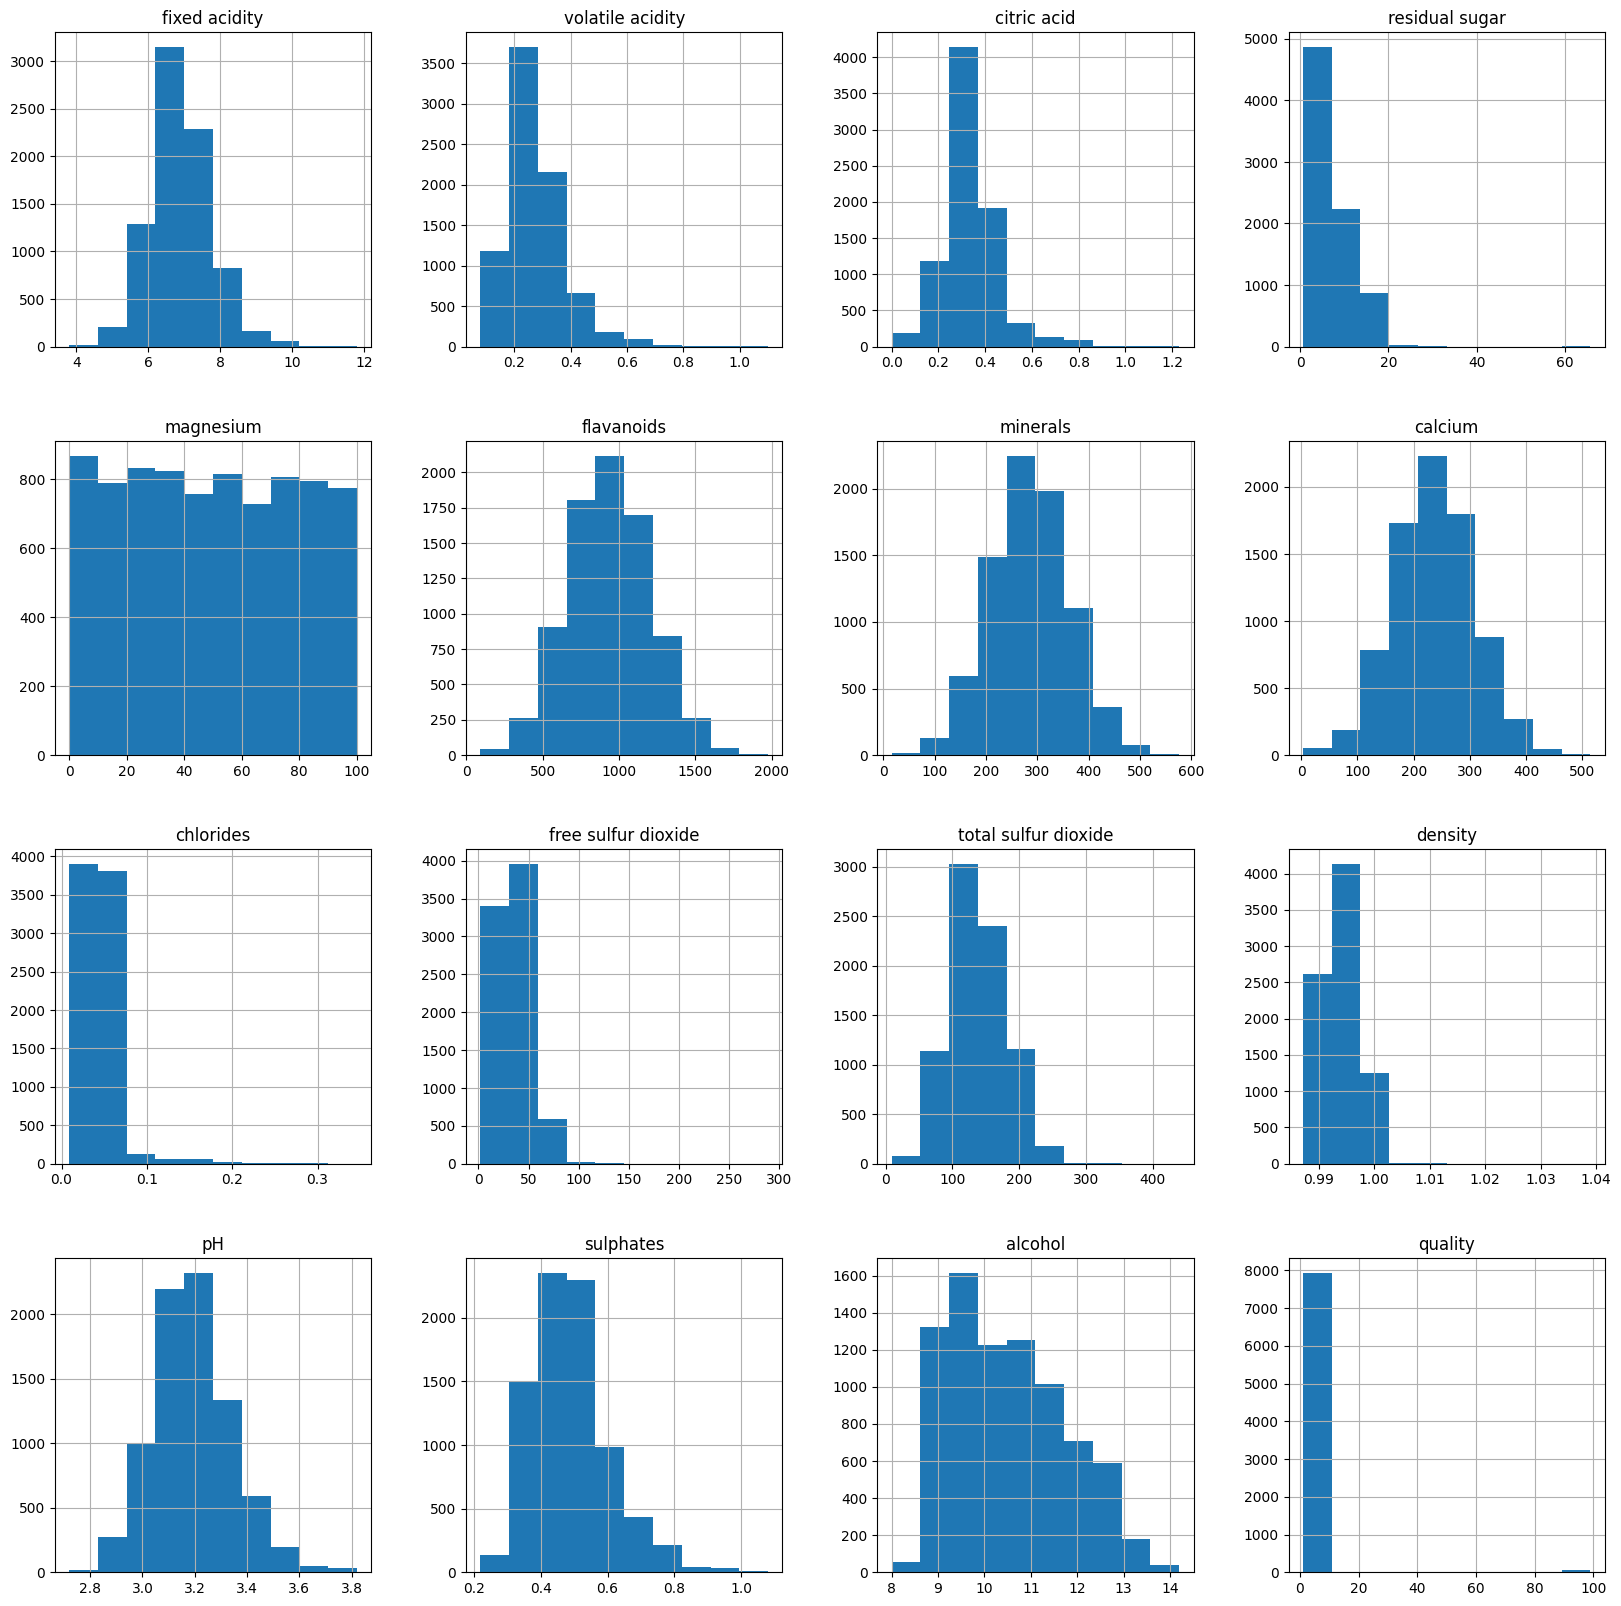

In [9]:
#create a histogram of the dataframe
df.hist(figsize=(20,20))